# Feature Selection Techniques

###### Referrals : https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

## 1. Supervised Feature Selection Techniques
## 2. Unsupervised Feature Selection Techniques

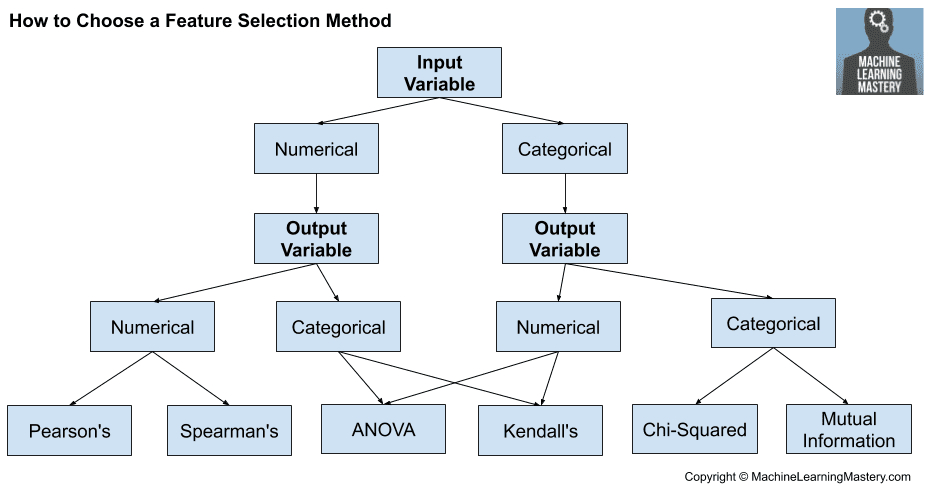

In [2]:
from IPython.display import Image
Image(filename= "C:/Users/Predator/Downloads/what_to_choose.jpg", width=800, height=800)

### Supervised Feature Selection Techniques

### 1. Filter methods
### 2. Wrapper methods

#### Wrapper methods

##### Wrapping features

#### 1. Forward Elimination

In [ ]:
#Forward Elimination starts with an empty set of features and iteratively combines features

In [ ]:
# We start with an empty set of selected features and initialize the best accuracy to 0.

# In each iteration, we evaluate the contribution of each remaining feature to the model's accuracy.

# The feature that leads to the highest accuracy improvement is added to the selected features set.

# The loop continues until the desired number of features (num_features_to_select) is reached.

# Finally, we print the selected features' indices and the best accuracy achieved during the forward selection process.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty set of selected features
selected_features = []
best_accuracy = 0.0

# Create a random forest classifier (you can use any classifier of your choice)
clf = RandomForestClassifier(random_state=42)

# Number of features to select (you can set this based on your requirements)
num_features_to_select = 3

while len(selected_features) < num_features_to_select:
    best_feature = None
    best_feature_accuracy = 0.0

    for feature_idx in range(X_train.shape[1]):
        if feature_idx not in selected_features:
            # Include the current feature in the selected features
            current_features = selected_features + [feature_idx]

            # Train the classifier on the current features
            clf.fit(X_train[:, current_features], y_train)

            # Make predictions on the test set
            y_pred = clf.predict(X_test[:, current_features])

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Check if this feature selection leads to a better accuracy
            if accuracy > best_feature_accuracy:
                best_feature_accuracy = accuracy
                best_feature = feature_idx

    # Add the best feature to the selected features
    selected_features.append(best_feature)

    # Update the best accuracy achieved so far
    if best_feature_accuracy > best_accuracy:
        best_accuracy = best_feature_accuracy

print("Selected Features (Indices):", selected_features)
print("Best Accuracy:", best_accuracy)


##### Implementing using built in functions

In [7]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\Predator\Desktop\Jupyter_Notebook\new\Scripts\python.exe -m pip install --upgrade pip


In [23]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [9]:
from sklearn.datasets import load_diabetes

In [10]:
diabetes=load_diabetes()

In [11]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [13]:
import pandas as pd
diabetes_df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diabetes_df["target"]=diabetes.target

In [14]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [16]:
diabetes_df.shape

(442, 11)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=diabetes_df.drop("target",axis=1)
y=diabetes_df["target"]

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
forward=SequentialFeatureSelector(RandomForestClassifier(n_jobs=1,
                                                         k_features=1,
                                                         forward=True,
                                                         floating=False,
                                                         verbose=2,
                                                         scoring="accuracy",
                                                         cv=5).fit(X_train,y_train))
                                            
                                                         

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'k_features'

In [1]:
import pandas as pd

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer=load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [7]:
cancer_df["target"]=cancer.target

In [8]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=cancer_df.drop("target",axis=1)
y=cancer_df["target"]

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [13]:
forward=SequentialFeatureSelector(RandomForestClassifier(n_jobs=1,
                                                         =1,
                                                         forward=True,
                                                         floating=False,
                                                         verbose=2,
                                                         scoring="accuracy",
                                                         cv=5).fit(X_train,y_train))

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'k_features'

In [15]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Create the SequentialFeatureSelector for forward selection
num_features_to_select = 5  # You can set the desired number of features
forward_selector = SequentialFeatureSelector(model, k_features=num_features_to_select, forward=True, scoring='accuracy', cv=5)

# Fit the forward selector to the training data
forward_selector.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = forward_selector.k_feature_idx_

# Train a model using the selected features
selected_features = X_train[:, selected_feature_indices]
model.fit(selected_features, y_train)

# Make predictions on the test set using the selected features
X_test_selected = X_test[:, selected_feature_indices]
y_pred = model.predict(X_test_selected)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Selected Feature Indices:", selected_feature_indices)
print("Accuracy with Selected Features:", accuracy)


Selected Feature Indices: (0, 1, 23, 24, 27)
Accuracy with Selected Features: 0.956140350877193


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

In [2]:
cancer=load_breast_cancer()

In [4]:
import pandas as pd
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)

In [5]:
cancer_df["target"]=cancer.target

In [6]:
X=cancer_df.drop("target",axis=1)
y=cancer_df["target"]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
my_model=LogisticRegression()
forward=SequentialFeatureSelector(my_model,k_features=4,forward=True,scoring="accuracy",cv=5,verbose=2).fit(X_train,y_train)


[2023-09-30 11:38:40] Features: 1/4 -- score: 0.9208791208791209
[2023-09-30 11:38:41] Features: 2/4 -- score: 0.9384615384615385
[2023-09-30 11:38:41] Features: 3/4 -- score: 0.956043956043956C:\Users\Predator\Desktop\Jupyter_Notebook\new\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

[2023-09-30 11:38:42] Features: 4/4 -- score: 0.9582417582417582

In [22]:
selected_features_index = forward.k_feature_idx_
selected_features_index

(20, 21, 25, 26)

In [25]:
# Train a model using the selected features
selected_features = X_train[:, selected_features_index]
my_model.fit(selected_features, y_train)

# Make predictions on the test set using the selected features
X_test_selected = X_test[:, selected_features_index]
y_pred = my_model.predict(X_test_selected)

InvalidIndexError: (slice(None, None, None), (20, 21, 25, 26))

In [26]:
cancer_df.shape

(569, 31)

#### 2. Backward elimination

In [29]:
from sklearn.datasets import load_breast_cancer
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
mycancer=load_breast_cancer()

In [31]:
X=mycancer.data
y=mycancer.target

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
model=RandomForestClassifier(random_state=42)

In [35]:
backward_model=SequentialFeatureSelector(model,
                                         k_features=5,
                                         forward=False,
                                         verbose=2,
                                         cv=5,
                                         scoring="accuracy").fit(X_train,y_train)


[2023-09-30 12:23:53] Features: 29/5 -- score: 0.9604395604395604
[2023-09-30 12:25:22] Features: 28/5 -- score: 0.964835164835165
[2023-09-30 12:26:51] Features: 27/5 -- score: 0.9648351648351647
[2023-09-30 12:28:04] Features: 26/5 -- score: 0.9648351648351647
[2023-09-30 12:28:35] Features: 25/5 -- score: 0.9648351648351647
[2023-09-30 12:29:02] Features: 24/5 -- score: 0.9670329670329672
[2023-09-30 12:29:28] Features: 23/5 -- score: 0.9670329670329669
[2023-09-30 12:29:52] Features: 22/5 -- score: 0.9670329670329669
[2023-09-30 12:30:15] Features: 21/5 -- score: 0.9736263736263737
[2023-09-30 12:30:37] Features: 20/5 -- score: 0.9714285714285713
[2023-09-30 12:30:58] Features: 19/5 -- score: 0.9736263736263737
[2023-09-30 12:31:18] Features: 18/5 -- score: 0.9714285714285715
[2023-09-30 12:31:36] Features: 17/5 -- score: 0.9714285714285713
[2023-09-30 12:31:54] Features: 16/5 -- score: 0.9758241758241759
[2023-09-30 12:32:09] Features: 15/5 -- score: 0.9758241758241759
[2023-09-3

In [36]:
indices=backward_model.k_feature_idx_
indices

(1, 8, 23, 24, 25)

In [37]:
backward_model.k_feature_names_

('1', '8', '23', '24', '25')

In [38]:
# Train a model using the selected features
selected_features = X_train[:, indices]
model.fit(selected_features, y_train)

# Make predictions on the test set using the selected features
X_test_selected = X_test[:, indices]
y_pred = model.predict(X_test_selected)

In [39]:
accuracy_score(y_test,y_pred)

0.9649122807017544

#### 3. Bidirectional Feature Extraction

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
bi_directional=SequentialFeatureSelector(model,
                                        k_features=3,
                                        forward=False,
                                        floating=True,
                                        cv=2,
                                        n_jobs=-1
                                        verbose=2)

In [40]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Create the SequentialFeatureSelector for forward selection
forward_selector = SequentialFeatureSelector(model, k_features=1, forward=True, verbose=2,scoring='accuracy', cv=5)

# Fit the forward selector to the training data
forward_selector.fit(X_train, y_train)

# Get the selected feature indices from forward selection
selected_feature_indices_forward = forward_selector.k_feature_idx_

# Create the SequentialFeatureSelector for backward elimination
backward_selector = SequentialFeatureSelector(model, k_features=1, forward=False, verbose=2,scoring='accuracy', cv=5)

# Fit the backward selector to the training data
backward_selector.fit(X_train, y_train)

# Get the selected feature indices from backward elimination
selected_feature_indices_backward = backward_selector.k_feature_idx_

# Combine the selected feature indices from both steps
selected_feature_indices = list(set(selected_feature_indices_forward) & set(selected_feature_indices_backward))

# Train a model using the selected features
selected_features = X_train[:, selected_feature_indices]
model.fit(selected_features, y_train)

# Make predictions on the test set using the selected features
X_test_selected = X_test[:, selected_feature_indices]
y_pred = model.predict(X_test_selected)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Selected Feature Indices:", selected_feature_indices)
print("Accuracy with Selected Features:", accuracy)



[2023-09-30 13:17:20] Features: 1/1 -- score: 0.887912087912088
[2023-09-30 13:17:57] Features: 29/1 -- score: 0.9604395604395604
[2023-09-30 13:18:32] Features: 28/1 -- score: 0.964835164835165
[2023-09-30 13:19:05] Features: 27/1 -- score: 0.9648351648351647
[2023-09-30 13:19:37] Features: 26/1 -- score: 0.9648351648351647
[2023-09-30 13:20:08] Features: 25/1 -- score: 0.9648351648351647
[2023-09-30 13:20:34] Features: 24/1 -- score: 0.9670329670329672
[2023-09-30 13:21:00] Features: 23/1 -- score: 0.9670329670329669
[2023-09-30 13:21:25] Features: 22/1 -- score: 0.9670329670329669
[2023-09-30 13:21:49] Features: 21/1 -- score: 0.9736263736263737
[2023-09-30 13:22:11] Features: 20/1 -- score: 0.9714285714285713
[2023-09-30 13:22:32] Features: 19/1 -- score: 0.9736263736263737
[2023-09-30 13:22:52] Features: 18/1 -- score: 0.9714285714285715
[2023-09-30 13:23:10] Features: 17/1 -- score: 0.9714285714285713
[2023-09-30 13:23:28] Features: 16/1 -- score: 0.9758241758241759
[2023-09-30 

ValueError: Found array with 0 feature(s) (shape=(455, 0)) while a minimum of 1 is required by RandomForestClassifier.

#### 4. Exhaustive feature extraction

In [42]:
from sklearn.datasets import load_breast_cancer
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [43]:
can=load_breast_cancer()

In [44]:
X=can.data
y=can.target

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
umodel=RandomForestClassifier(random_state=42)

In [ ]:
exhaustive=ExhaustiveFeatureSelector(umodel,
                                     min_features=2,
                                     max_features=5,
                                     scoring="accuracy",
                                     cv=2).fit(X_train,y_train)
                                     

#### 5. Recursive Feature Elimination

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
cancer=load_breast_cancer()

In [3]:
X=cancer.data
y=cancer.target

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
model=RandomForestClassifier(random_state=42)

In [6]:
rfe=RFE(estimator=model,n_features_to_select=4).fit(X_train,y_train)

In [7]:
indices=rfe.support_

In [8]:
# Train a model using the selected features
selected_features = X_train[:, indices]
model.fit(selected_features, y_train)

# Make predictions on the test set using the selected features
X_test_selected = X_test[:, indices]
y_pred = model.predict(X_test_selected)

In [10]:
accuracy_score(y_test,y_pred)

0.956140350877193

In [11]:
indices

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False])

### Implementing each one from scratch

In [13]:
#backward feature elimination

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Specify the number of features to select
num_features_to_select = 5  # You can set this based on your requirements

# Initialize the set of selected features with all features
selected_features = set(range(X_train.shape[1]))

while len(selected_features) > num_features_to_select:
    # Initialize variables to keep track of the best feature to remove and the corresponding accuracy
    best_feature_to_remove = None
    best_accuracy = 0.0

    for feature_to_remove in selected_features:
        # Create a copy of the selected features without the feature to remove
        remaining_features = [f for f in selected_features if f != feature_to_remove]

        # Train the model on the remaining features
        model.fit(X_train[:, remaining_features], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[:, remaining_features])

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Check if this feature removal leads to a better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_to_remove = feature_to_remove

    # Remove the feature that led to the best accuracy
    selected_features.remove(best_feature_to_remove)

# Train a model using the selected features
selected_features = list(selected_features)
selected_features.sort()
selected_features = np.array(selected_features)
model.fit(X_train[:, selected_features], y_train)

# Make predictions on the test set using the selected features
X_test_selected = X_test[:, selected_features]
y_pred = model.predict(X_test_selected)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Selected Feature Indices:", selected_features)
print("Accuracy with Selected Features:", accuracy)


Selected Feature Indices: [22 24 26 28 29]
Accuracy with Selected Features: 1.0


In [14]:
#Forward feature selection

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Specify the number of features to select
num_features_to_select = 5  # You can set this based on your requirements

# Initialize an empty set of selected features
selected_features = set()

while len(selected_features) < num_features_to_select:
    # Initialize variables to keep track of the best feature to add and the corresponding accuracy
    best_feature_to_add = None
    best_accuracy = 0.0

    for feature_to_add in range(X_train.shape[1]):
        # Skip features that are already selected
        if feature_to_add in selected_features:
            continue

        # Create a copy of the selected features along with the feature to add
        candidate_features = list(selected_features)
        candidate_features.append(feature_to_add)

        # Train the model on the candidate features
        model.fit(X_train[:, candidate_features], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[:, candidate_features])

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Check if adding this feature leads to a better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_to_add = feature_to_add

    # Add the feature that led to the best accuracy
    selected_features.add(best_feature_to_add)

# Convert selected features to a list and sort them
selected_features = list(selected_features)
selected_features.sort()

# Train a model using the selected features
model.fit(X_train[:, selected_features], y_train)

# Make predictions on the test set using the selected features
X_test_selected = X_test[:, selected_features]
y_pred = model.predict(X_test_selected)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Selected Feature Indices:", selected_features)
print("Accuracy with Selected Features:", accuracy)


Selected Feature Indices: [4, 16, 23, 24, 29]
Accuracy with Selected Features: 0.9912280701754386


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Specify the number of features to select
num_features_to_select = 5  # You can set this based on your requirements

# Initialize an empty set of selected features
selected_features = set()

while len(selected_features) < num_features_to_select:
    # Initialize variables to keep track of the best feature to add and remove, and the corresponding accuracy
    best_feature_to_add = None
    best_feature_to_remove = None
    best_accuracy = 0.0

    # Forward step: Add the most important feature
    for feature_to_add in range(X_train.shape[1]):
        # Skip features that are already selected
        if feature_to_add in selected_features:
            continue

        # Create a copy of the selected features along with the feature to add
        candidate_features = list(selected_features)
        candidate_features.append(feature_to_add)

        # Train the model on the candidate features
        model.fit(X_train[:, candidate_features], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[:, candidate_features])

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Check if adding this feature leads to a better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_to_add = feature_to_add

    # Backward step: Remove the least important feature
    for feature_to_remove in selected_features:
        # Create a copy of the selected features without the feature to remove
        candidate_features = [f for f in selected_features if f != feature_to_remove]

        # Train the model on the candidate features
        model.fit(X_train[:, candidate_features], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[:, candidate_features])

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Check if removing this feature leads to a better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_feature_to_add = None
            best_feature_to_remove = feature_to_remove

    # Add the best feature to add and remove the best feature to remove (if any)
    if best_feature_to_add is not None:
        selected_features.add(best_feature_to_add)
    if best_feature_to_remove is not None:
        selected_features.remove(best_feature_to_remove)

# Convert selected features to a list and sort them
selected_features = list(selected_features)
selected_features.sort()

# Train a model using the selected features
model.fit(X_train[:, selected_features], y_train)

# Make predictions on the test set using the selected features
X_test_selected = X_test[:, selected_features]
y_pred = model.predict(X_test_selected)

# Calculate the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Selected Feature Indices:", selected_features)
print("Accuracy with Selected Features:", accuracy)


## Filter Methods

### 1. Variance Threshold

In [3]:
import pandas as pd
df=pd.read_csv("C:/Users/Predator/Downloads/santander.csv")

In [4]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
df.shape

(76020, 371)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [7]:
X=df.drop("TARGET",axis=1)
y=df["TARGET"]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
variance_threshold=VarianceThreshold(threshold=0)

In [10]:
variance_threshold.fit(X_train)

VarianceThreshold(threshold=0)

In [25]:
variance_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [11]:
constant_columns=[columns for columns in X_train.columns if columns not in X_train.columns[variance_threshold.get_support()] ]

In [12]:
constant_columns

['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var29_hace3']

In [13]:
X_train.drop(constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
20731,41517,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76041.960000
65772,131309,2,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94024.050000
45571,91164,2,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111306.990000
55900,111533,2,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
75618,151051,2,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97021.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,74348,2,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195450.930000
6265,12597,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84892.950000
54886,109515,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63733.770000
860,1703,2,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101492.340000


### 2. Pearson Correlation

In [1]:
import seaborn as sns

<Axes: >

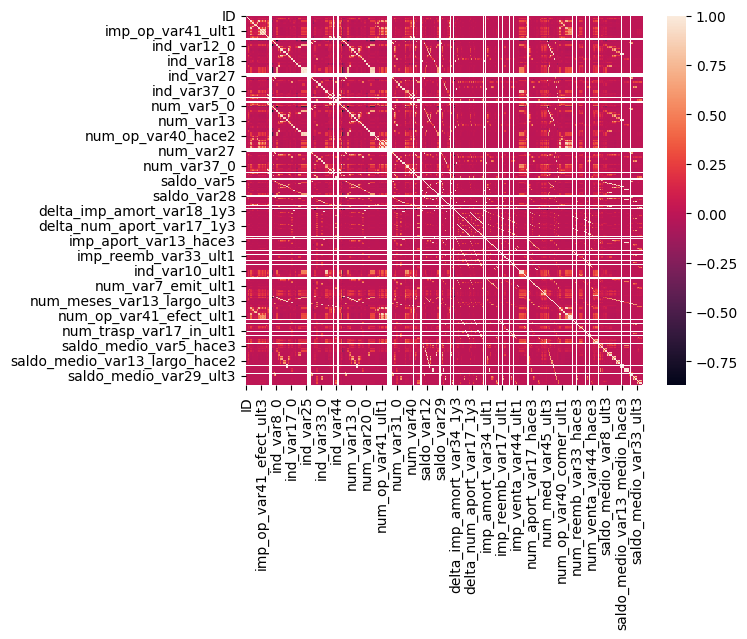

In [14]:
sns.heatmap(X_train.corr())

In [17]:
X_train.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,0.000874,-0.002955,-0.002637,-0.000427,-0.003947,-0.006086,-0.005272,-0.006926,-0.006478,...,-0.008728,-0.000233,0.001108,-0.003245,-0.002979,-0.004231,0.001297,-0.003793,-0.002536,-0.008116
var3,0.000874,1.000000,-0.004721,0.001726,0.005167,0.006190,0.001482,0.001637,0.000724,0.000725,...,0.000221,0.000678,0.000434,0.000606,0.000627,0.000567,0.000459,0.000691,0.000728,0.000071
var15,-0.002955,-0.004721,1.000000,0.044960,0.093259,0.098760,0.041236,0.044946,0.015756,0.013988,...,0.008540,0.029412,0.016263,0.028703,0.029090,0.030015,0.017901,0.033482,0.033715,0.009119
imp_ent_var16_ult1,-0.002637,0.001726,0.044960,1.000000,0.037066,0.031935,0.011546,0.011422,0.001249,0.003524,...,0.014221,-0.000789,-0.000547,-0.000469,-0.000436,-0.000455,-0.000528,-0.000353,-0.000245,-0.000473
imp_op_var39_comer_ult1,-0.000427,0.005167,0.093259,0.037066,1.000000,0.888046,0.342071,0.294846,0.046362,0.071187,...,0.003619,0.004648,-0.001417,0.005422,0.005150,0.008362,0.003872,0.011137,0.009352,0.008098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.004231,0.000567,0.030015,-0.000455,0.008362,0.008153,-0.000556,-0.000607,-0.000274,-0.000273,...,0.006971,0.001480,-0.000158,0.003561,0.003267,1.000000,0.333542,0.853736,0.745602,0.003012
saldo_medio_var44_hace3,0.001297,0.000459,0.017901,-0.000528,0.003872,0.006113,-0.000443,-0.000484,-0.000218,-0.000218,...,-0.000067,-0.000196,-0.000126,-0.000176,-0.000182,0.333542,1.000000,0.259611,0.238616,0.001497
saldo_medio_var44_ult1,-0.003793,0.000691,0.033482,-0.000353,0.011137,0.009790,-0.000679,-0.000743,-0.000334,-0.000334,...,0.022118,0.001175,-0.000193,0.002961,0.002708,0.853736,0.259611,1.000000,0.968131,0.004082
saldo_medio_var44_ult3,-0.002536,0.000728,0.033715,-0.000245,0.009352,0.007664,-0.000716,-0.000783,-0.000353,-0.000352,...,0.018527,0.001404,-0.000204,0.003485,0.003191,0.745602,0.238616,0.968131,1.000000,0.003964


In [22]:
def correlation(df,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [21]:
corr_features=correlation(X_train,0.7)
corr_features

{'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_ult1',
 'imp_aport_var13_ult1',
 'imp_aport_var17_hace3',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_reemb_var33_ult1',
 'imp_trans_var37_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_trasp_var33_out_ult1',
 'imp_venta_var44_hace3',
 'imp_venta_var4

In [19]:
X_train.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,ind_var1_0,...,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace3,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
20731,41517,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,76041.960000
65772,131309,2,51,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,94024.050000
45571,91164,2,44,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,111306.990000
55900,111533,2,57,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,117310.979016
75618,151051,2,61,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,97021.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,74348,2,42,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,195450.930000
6265,12597,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,84892.950000
54886,109515,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.00,0.0,0.0,0,0.0,0.0,0.0,0.0,63733.770000
860,1703,2,17,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,5000.04,0.0,0.0,0,0.0,0.0,0.0,0.0,101492.340000


In [23]:
X_train.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace2    0
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
Length: 370, dtype: int64

#### 3. Information Gain

##### 
Information gain = entropy(parent) - [weighted average] * entropy(child)


##### Entropy is the level of uncertainity or randomness in features

###### In this example, we load the Iris dataset, which is a well-known dataset for classification. We then use scikit-learn's SelectKBest feature selection method with mutual_info_classif as the scoring function to select the top-K features based on Information Gain.

##### I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.ures based on Information Gain.
�
(
�
∣
�
)
IG(X)=H(Y)−H(Y∣X)
Information Gain measures how much the entropy of the target variable decreases when you know the feature's value.

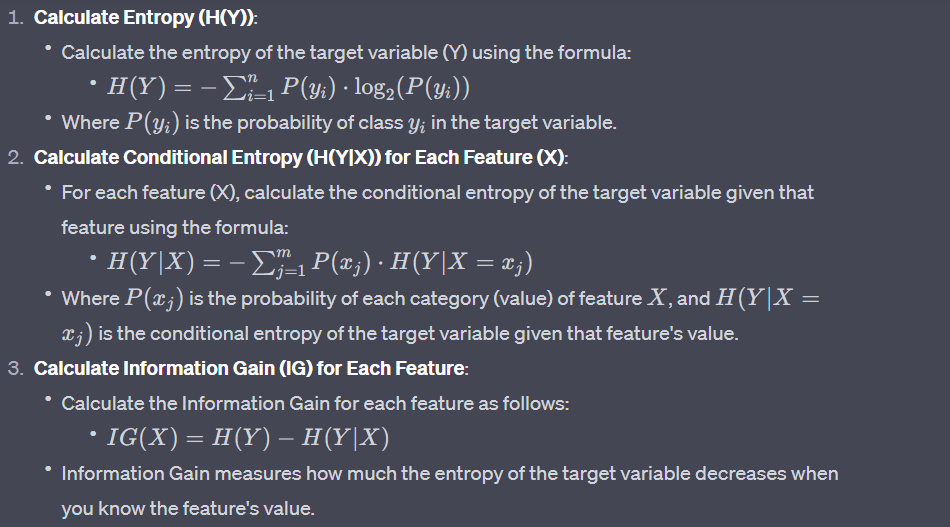

In [53]:
from IPython.display import Image
Image(filename= "C:/Users/Predator/Pictures/Screenshots/entropy.png", width=800, height=800)

In [24]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest,mutual_info_classif

In [26]:
iris=load_iris()

In [27]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df["target"]=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
X=iris_df.drop("target",axis=1)
y=iris_df["target"]

In [29]:
selector=SelectKBest(score_func=mutual_info_classif,k=2)
X_new=selector.fit_transform(X,y)

In [31]:
indices=selector.get_support(indices=True)
selected_features=X.columns[indices]

In [32]:
selected_features

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [33]:
mutual_info_classif(X,y)

array([0.4585219 , 0.22102328, 0.99246975, 0.97840965])

<Axes: >

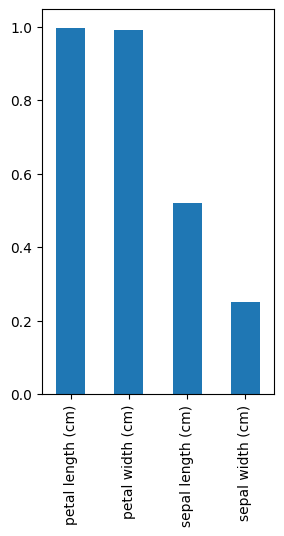

In [43]:

mutual_info = pd.Series(mutual_info_classif(X,y))
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(3,5))

#### 4. Chi-Square and Anova test

https://www.youtube.com/watch?v=YrhlQB3mQFI

##### p-value : significance value

### Chi Square

#### Chi square is used for categorical dependent and independent variables

##### 
This article was published as a part of the Data Science Blogathon
Introduction
In the last blog we looked at a test to find out correlation between the continuous variable in our data which you can read here. In this blog we will take a look at an important test that we can conduct to find out the correlation between the categorical variables in our data is Chi-Square Test, I will try to make the blog easy to understand focusing more on the implementation rather than the theory behind the test in this blog we will be looking at topics like:

What is Chi-Square Test?
How to implement the Chi-Square Test in Python?
How to visualize the results of the test using a heat-map?
image
(Image Link)
What is Chi-Square Test?
Chi-Square test is a statistical test which is used to find out the difference between the observed and the expected data we can also use this test to find the correlation between categorical variables in our data. The purpose of this test is to determine if the difference between 2 categorical variables is due to chance, or if it is due to a relationship between them.

Chi Square Test formula
Formula for Chi-Square Test (Image Link)
It is important to note that the variables to be compared should have only 2 categories i.e 1 and 0 the chi-square test fails to determine the correlation between variables with more than 2 categories.

While conducting the chi-square test we have to initially consider 2 hypothesis i.e the Null Hypothesis and the Alternate Hypothesis.

H0 (Null Hypothesis) = The 2 variables to be compared are independent.
H1 (Alternate Hypothesis) = The 2 variables are dependent.
Now, if the p-value obtained after conducting the test is less than 0.05 we reject the Null hypothesis and accept the Alternate hypothesis and if the p-value is greater that 0.05 we accept the Null hypothesis and reject the Alternate hypothesis.

##### If the observed values are close to expected values then there is no relationship
##### But if observed valuea are very far from expected values then there is relationship

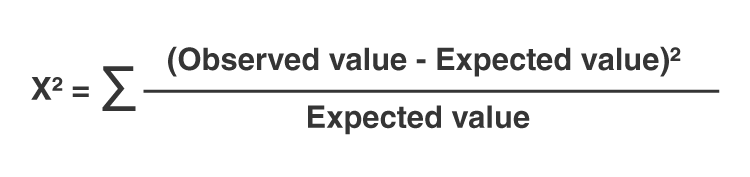

In [75]:
from IPython.display import Image
Image(filename= "C:/Users/Predator/Downloads/Chi-Square-Test.png", width=800, height=800)

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load your dataset
# For this example, let's assume you have a DataFrame 'data' with features and a target column 'target'
# Make sure 'data' contains only categorical or discrete features

# Separate features (X) and the target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Select the number of top features to keep (K)
k = 5  # Adjust as needed

# Apply chi-squared feature selection
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Display the selected features
print("Selected Features:")
print(selected_features)


In [54]:
titanic=sns.load_dataset("titanic")

In [55]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
titanic["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [64]:
new_titanic=titanic[["survived","sex","pclass","embarked"]]

In [65]:
new_titanic.head()

,survived,sex,pclass,embarked
0,0,male,3,S
1,1,female,1,C
2,1,female,3,S
3,1,female,1,S
4,0,male,3,S


In [66]:
new_titanic.isnull().sum()

survived    0
sex         0
pclass      0
embarked    2
dtype: int64

In [69]:
new_titanic.dropna(inplace=True)

C:\Users\Predator\AppData\Local\Temp\ipykernel_7120\2201704809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_titanic.dropna(inplace=True)


In [70]:
new_titanic.isnull().sum()

survived    0
sex         0
pclass      0
embarked    0
dtype: int64

In [72]:
X=new_titanic.drop("survived",axis=1)
y=new_titanic["survived"]

In [74]:
X.head()

,sex,pclass,embarked
0,male,3,S
1,female,1,C
2,female,3,S
3,female,1,S
4,male,3,S


In [88]:
from sklearn.preprocessing import OrdinalEncoder
ordinal=OrdinalEncoder()

In [89]:
X[["sex","embarked"]]=ordinal.fit_transform(X[["sex","embarked"]])

In [90]:
X.head()

,sex,pclass,embarked
0,1.0,3,2.0
1,0.0,1,0.0
2,0.0,3,2.0
3,0.0,1,2.0
4,1.0,3,2.0


In [91]:
from sklearn.feature_selection import chi2,SelectKBest

In [98]:
select=SelectKBest(score_func=chi2,k=2)

In [99]:
selector=select.fit_transform(X,y)

In [101]:
selected_features = X.columns[select.get_support()]
selected_features

Index(['sex', 'pclass'], dtype='object')

### Anova (Analysis of Variance)

#### F_value=(Variance within groups/Variance within a group)

##### Also Anova is used when the independent variables are categorical and dependent variable is continuous
##### T-test : when there is only categories in a  categorical feature
##### Anova: when there more than two categories in a categorical feature

In [69]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Load your dataset
# For this example, let's assume you have a DataFrame 'data' with numerical features and a target column 'target'

# Separate features (X) and the target variable (y)
X = data.drop('target', axis=1)
y = data['target']

# Select the number of top features to keep (K)
k = 5  # Adjust as needed

# Apply ANOVA feature selection
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Display the selected features
print("Selected Features:")
print(selected_features)


NameError: name 'data' is not defined

In [18]:
import pandas as pd
from sklearn.feature_selection import f_classif,SelectKBest

In [19]:
import seaborn as sns

In [46]:
df=sns.load_dataset("titanic")

In [47]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
new_df=df[["survived","pclass","age","fare"]]

In [50]:
new_df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [56]:
new_df.isnull().sum()

survived    0
pclass      0
age         0
fare        0
dtype: int64

In [55]:
new_df.dropna(inplace=True)

C:\Users\Predator\AppData\Local\Temp\ipykernel_16572\1925939579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


In [57]:
X=new_df.drop("survived",axis=1)
y=new_df["survived"]

In [65]:
select=SelectKBest(score_func=f_classif,k=2)

In [70]:
selector=select.fit(X,y)

In [72]:
selected_features = X.columns[selector.get_support(indices=True)]
selected_features

Index(['pclass', 'fare'], dtype='object')

## Embedded Methods

##### Unlike filter methods (which select features independently of the machine learning model) and wrapper methods (which use a separate model to evaluate subsets of features), embedded methods incorporate feature selection directly into the model training process. 

### 1. Regularization

##### Regularization basically adds the penalty as model complexity increases.as the complexity is increasing, regularization will add the penalty for higher terms. regularization is for regression

#### L1 regularization (lasso regularization)

##### Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

##### (y-y^)^2 + λ|slope|

##### L1 regularization adds modulus of coefficients as the penalty to the model. Features with high weight will be eliminated

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [88]:
ir=load_iris()
iris=pd.DataFrame(ir.data,columns=ir.feature_names)
iris["target"]=ir.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [89]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [91]:
X=iris.drop("target",axis=1)
y=iris["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [109]:
sel=SelectFromModel(estimator=LogisticRegression(C=0.1,penalty="l1",solver="liblinear")).fit(X_train,y_train)

In [110]:
sel.get_feature_names_out()

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'],
      dtype=object)

In [111]:
X_train1=sel.transform(X_train)
X_test1=sel.transform(X_test)

In [112]:
model=LogisticRegression()
model.fit(X_train1,y_train)

LogisticRegression()

In [113]:
y_pred=model.predict(X_test1)

In [114]:
accuracy_score(y_test,y_pred)

0.9777777777777777

### L2 regularization

##### (y-y^)^2 + λ(slope)^2
##### L2 regularization (Ridge) adds the squares of the coefficients as a penalty. While it doesn't set coefficients to exactly zero like L1 regularization, it tends to shrink the coefficients of less important features towards zero. This makes the model more robust to multicollinearity and reduces the impact of irrelevant features.

##### By default logistic regression uses L2 regression

In [116]:
from sklearn.datasets import load_breast_cancer
can=load_breast_cancer()
cancer=pd.DataFrame(can.data,columns=can.feature_names)
cancer["target"]=can.target

In [117]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [118]:
X_train,X_test,y_train,y_test=train_test_split(cancer.drop("target",axis=1),cancer["target"],test_size=0.3,random_state=100)

In [119]:
X_train.shape,X_test.shape

((398, 30), (171, 30))

In [120]:
sele=SelectFromModel(LogisticRegression(penalty="l2",
                                       C=0.5,
                                       solver="liblinear",)).fit(X_train,y_train)

In [121]:
sele.get_feature_names_out()

array(['mean radius', 'mean perimeter', 'mean concavity', 'texture error',
       'perimeter error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst compactness', 'worst concavity',
       'worst concave points'], dtype=object)

In [122]:
len(sele.get_feature_names_out())

11

In [124]:
X_train2=sele.transform(X_train)
X_test2=sele.transform(X_test)

In [126]:
mymodel=LogisticRegression()
mymodel.fit(X_train2,y_train)

C:\Users\Predator\Desktop\Jupyter_Notebook\new\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
y_pred2=mymodel.predict(X_test2)

In [128]:
accuracy_score(y_test,y_pred2)

0.9590643274853801